=== ADDESTRAMENTO MODELLI DI MACHINE LEARNING ===
Dataset caricato: (1546, 265)
Features: 260, Campioni: 1546
Emozioni codificate: {'Angry': 0, 'Happy': 1, 'Relaxed': 2, 'Sad': 3}
Features standardizzate

Split dati:
Training set: 1236 campioni
Test set: 310 campioni
Distribuzione training: (array([0, 1, 2, 3]), array([300, 337, 302, 297]))
Distribuzione test: (array([0, 1, 2, 3]), array([75, 84, 76, 75]))

RISULTATI ADDESTRAMENTO

--- Random Forest ---
Accuracy: 0.245

Classification Report:
              precision    recall  f1-score   support

       Angry       0.24      0.23      0.23        75
       Happy       0.30      0.40      0.34        84
     Relaxed       0.20      0.17      0.19        76
         Sad       0.20      0.16      0.18        75

    accuracy                           0.25       310
   macro avg       0.23      0.24      0.23       310
weighted avg       0.24      0.25      0.24       310



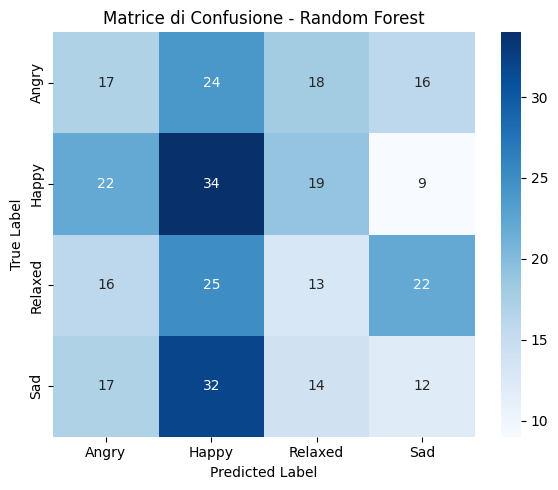


--- SVM ---
Accuracy: 0.265

Classification Report:
              precision    recall  f1-score   support

       Angry       0.22      0.17      0.19        75
       Happy       0.30      0.61      0.40        84
     Relaxed       0.27      0.20      0.23        76
         Sad       0.12      0.04      0.06        75

    accuracy                           0.26       310
   macro avg       0.23      0.25      0.22       310
weighted avg       0.23      0.26      0.23       310



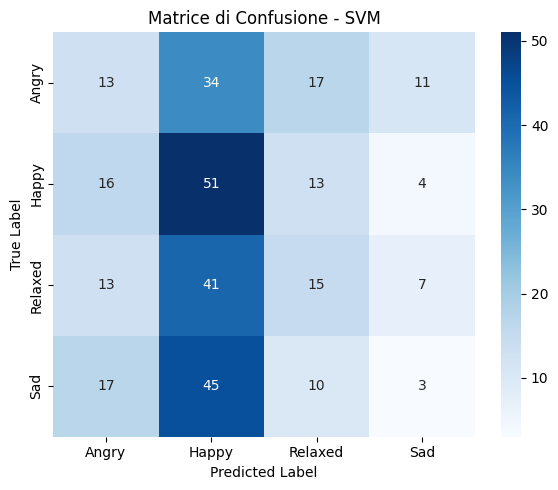


--- K-NN ---
Accuracy: 0.210

Classification Report:
              precision    recall  f1-score   support

       Angry       0.17      0.25      0.20        75
       Happy       0.24      0.30      0.26        84
     Relaxed       0.22      0.18      0.20        76
         Sad       0.23      0.09      0.13        75

    accuracy                           0.21       310
   macro avg       0.22      0.21      0.20       310
weighted avg       0.22      0.21      0.20       310



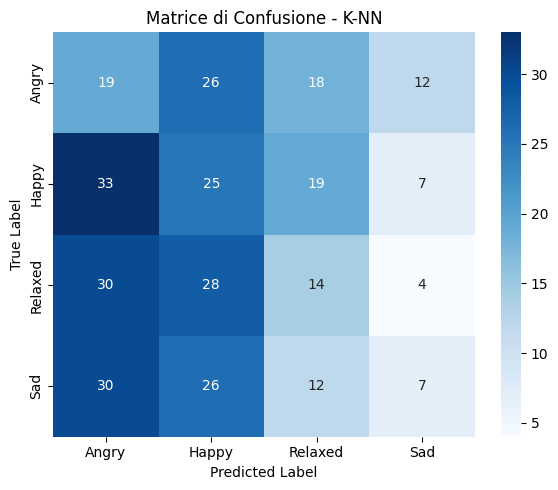


--- Logistic Regression ---
Accuracy: 0.203

Classification Report:
              precision    recall  f1-score   support

       Angry       0.19      0.20      0.20        75
       Happy       0.16      0.17      0.16        84
     Relaxed       0.30      0.29      0.30        76
         Sad       0.17      0.16      0.16        75

    accuracy                           0.20       310
   macro avg       0.21      0.20      0.20       310
weighted avg       0.20      0.20      0.20       310



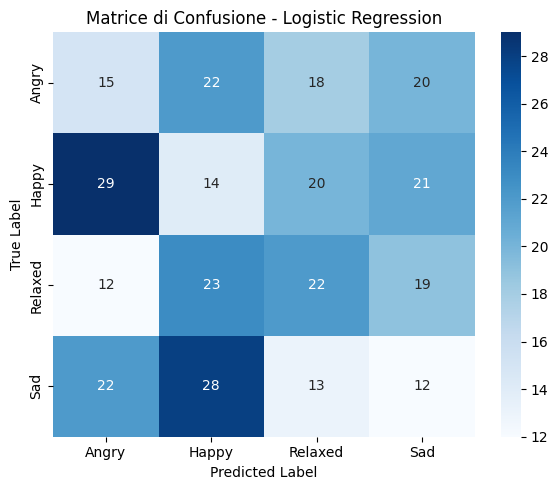


CONFRONTO FINALE MODELLI


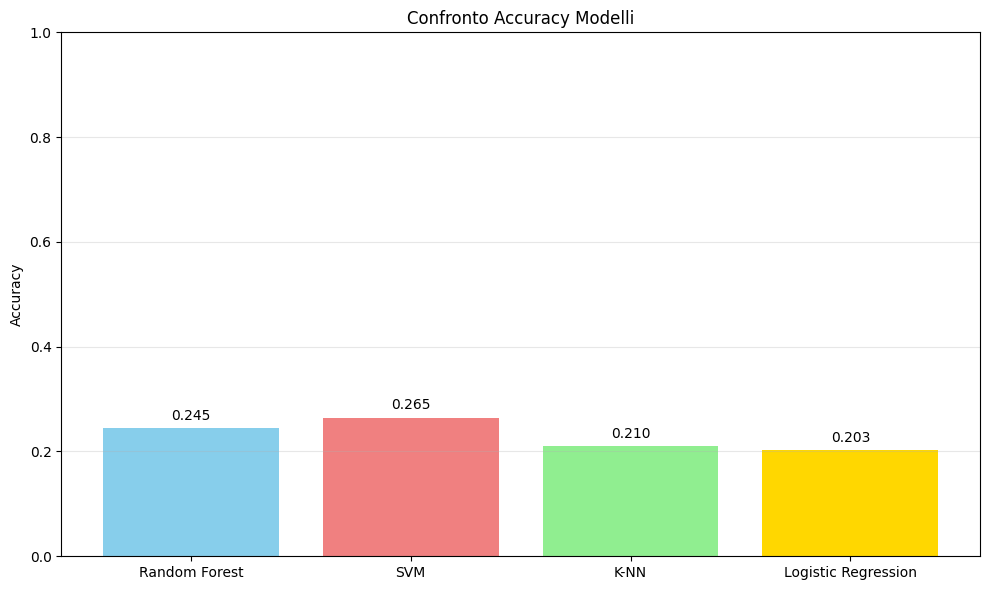


Tabella Riassuntiva (ordinata per accuracy):
               Modello  Accuracy
1                  SVM  0.264516
0        Random Forest  0.245161
2                 K-NN  0.209677
3  Logistic Regression  0.203226

MIGLIOR MODELLO: SVM (Accuracy: 0.265)

--- VALIDATION CROSS SVM ---
Accuracy CV (5-fold): 0.261 (+/- 0.047)

Modello salvato in: ../models/best_emotion_classifier.pkl
Scaler salvato in: ../models/scaler.pkl
Encoder salvato in: ../models/label_encoder.pkl

ADDESTRAMENTO COMPLETATO!


In [2]:
# NOTEBOOK 4: MODEL TRAINING - CODICE COMPLETO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=== ADDESTRAMENTO MODELLI DI MACHINE LEARNING ===")

# 1. CARICAMENTO DATASET
df = pd.read_csv('../data/processed/audio_emotion_dataset.csv')
print(f"Dataset caricato: {df.shape}")

# 2. PREPARAZIONE DATI (RIPETERE I PASSAGGI DEL NOTEBOOK 3)
# Separazione features (X) e target (y)
X = df.drop(columns=['Track_ID', 'Title', 'Valence', 'Arousal', 'Emotion_Label'])
y = df['Emotion_Label']

print(f"Features: {X.shape[1]}, Campioni: {X.shape[0]}")

# Codifica label emozionali in numeri
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Emozioni codificate: {dict(zip(le.classes_, range(len(le.classes_))))}")

# Standardizzazione delle features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features standardizzate")

# 3. SPLIT TRAIN-TEST
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nSplit dati:")
print(f"Training set: {X_train.shape[0]} campioni")
print(f"Test set: {X_test.shape[0]} campioni")
print(f"Distribuzione training: {np.unique(y_train, return_counts=True)}")
print(f"Distribuzione test: {np.unique(y_test, return_counts=True)}")

# 4. DEFINIZIONE MODELLI
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# 5. ADDESTRAMENTO E VALUTAZIONE
results = {}

print("\n" + "="*50)
print("RISULTATI ADDESTRAMENTO")
print("="*50)

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Addestramento
    model.fit(X_train, y_train)
    
    # Predizione
    y_pred = model.predict(X_test)
    
    # Metriche
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Matrice di confusione
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matrice di Confusione - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# 6. CONFRONTO FINALE MODELLI
print("\n" + "="*50)
print("CONFRONTO FINALE MODELLI")
print("="*50)

# Grafico confronto accuracy
plt.figure(figsize=(10, 6))
models_names = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(models_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Confronto Accuracy Modelli')
plt.grid(axis='y', alpha=0.3)

# Aggiunta dei valori sulle barre
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Tabella riassuntiva
results_df = pd.DataFrame({
    'Modello': models_names,
    'Accuracy': accuracies
}).sort_values('Accuracy', ascending=False)

print("\nTabella Riassuntiva (ordinata per accuracy):")
print(results_df)

# 7. SELEZIONE MIGLIOR MODELLO
best_model_name = results_df.iloc[0]['Modello']
best_model = models[best_model_name]
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\nMIGLIOR MODELLO: {best_model_name} (Accuracy: {best_accuracy:.3f})")

# 8. VALIDATION CROSS (OPZIONALE MA CONSIGLIATO)
print(f"\n--- VALIDATION CROSS {best_model_name} ---")
cv_scores = cross_val_score(best_model, X_scaled, y_encoded, cv=5)
print(f"Accuracy CV (5-fold): {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# 9. SALVATAGGIO MODELLO (per il prototipo)
import joblib

model_path = '../models/best_emotion_classifier.pkl'
scaler_path = '../models/scaler.pkl'
encoder_path = '../models/label_encoder.pkl'

# Creazione cartelle se non esistono
import os
os.makedirs('../models', exist_ok=True)

# Salvataggio di: modello, scaler ed encoder
joblib.dump(best_model, model_path)
joblib.dump(scaler, scaler_path)
joblib.dump(le, encoder_path)

print(f"\nModello salvato in: {model_path}")
print(f"Scaler salvato in: {scaler_path}")
print(f"Encoder salvato in: {encoder_path}")

print("\nADDESTRAMENTO COMPLETATO!")